# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [46]:
__author__ = 'zem232'
from __future__ import print_function, division
import sys
import os
import numpy as np
import pylab as pl
import pandas as pd
import scipy
from scipy import stats
from scipy.optimize import minimize
import statsmodels.api as sm
import statsmodels.formula.api as smf
import json
import os
import urllib.request
import seaborn as sns

np.random.seed(99)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'xlabel', 'ylabel', 'scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
## checking if PUIdata directory exists, & if not creating directory
puidata = os.getenv("PUIDATA")
if os.getenv('%s/PUIdata'%os.getenv('HOME')) is None:
    os.system('mkdir %s/PUIdata'%os.getenv('HOME'))
    
## checking if PUIDATA variable exists, & creating new variable
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [3]:
url='https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/export?format=csv'
urllib.request.urlretrieve(url,'worldguns+murders+violence.csv')
! mv 'worldguns+murders+violence.csv' $PUIDATA

In [4]:
url='data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
urllib.request.urlretrieve(url,'data-pvLFI.csv')
! rm $PUIDATA/*data-pvLFI*
! mv 'data-pvLFI.csv' $PUIDATA


In [5]:
! rm *API_SP.POP.TOTL_DS2_en_csv*
! rm $PUIDATA/*API_SP.POP*
url='http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
urllib.request.urlretrieve(url,'API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip')
! rm $PUIDATA/*API_SL.TLF.TOTL.IN_DS2*
! unzip 'API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip' -d $PUIDATA
files = ! ls $PUIDATA | grep 'API_SP.POP.TOTL_DS2_en_csv'
POP=[(k) for k in files if 'Metadata' not in k]

rm: cannot remove '/nfshome/zem232/PUIdata/*API_SL.TLF.TOTL.IN_DS2*': No such file or directory
Archive:  API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip
  inflating: /nfshome/zem232/PUIdata/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: /nfshome/zem232/PUIdata/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: /nfshome/zem232/PUIdata/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  


In [6]:
! rm *Data_Extract_From_World_Development_Indicators*
! rm $PUIDATA/*API_NY.GDP*
url='http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'
urllib.request.urlretrieve(url,'Data_Extract_From_World_Development_Indicators.zip')
! unzip 'Data_Extract_From_World_Development_Indicators.zip' -d $PUIDATA
files = ! ls $PUIDATA | grep 'API_NY.GDP.MKTP.CD_DS2_en_csv'
GDP=[(k) for k in files if 'Metadata' not in k]

Archive:  Data_Extract_From_World_Development_Indicators.zip
  inflating: /nfshome/zem232/PUIdata/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/zem232/PUIdata/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/zem232/PUIdata/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  


In [7]:
gdp=pd.read_csv(os.getenv('PUIDATA')+ '/' + GDP[0], skiprows=4)
dropcols=[i for i in gdp.columns.values if i != 'Country Name' and i != '2012']
gdp.drop(dropcols,axis=1,inplace=True)
gdp.dropna(axis=0,inplace=True)
gdp.rename(columns={'Country Name':'Country','2012':'gdp'},inplace=True)

In [8]:
pop=pd.read_csv(os.getenv('PUIDATA')+ '/'+POP[0], skiprows=4)
dropcols=[i for i in pop.columns.values if i != 'Country Name' and i != '2012']
pop.drop(dropcols,axis=1,inplace=True)
pop.dropna(axis=0,inplace=True)
pop.rename(columns={'Country Name':'Country','2012':'pop'},inplace=True)

In [9]:
guns=pd.read_csv(os.getenv('PUIDATA')+'/data-pvLFI.csv')
guns.rename(columns={'Guns per 100 inhabitants':'Guns/100 inhabitants','Number of mass shootings (1983-2013)':'# mass shootings'},inplace=True)

In [10]:
df=pd.read_csv(os.getenv('PUIDATA')+'/worldguns+murders+violence.csv')
df.rename(columns={'Country/Territory':'Country'},inplace=True)
dropcols=[i for i in df.columns.values if i != 'Country' and i != 'Number of homicides by firearm' and i != 'Average total all civilian firearms']
df.drop(dropcols,axis=1,inplace=True)

In [11]:
df_=gdp.merge(pop,on='Country').merge(guns,on='Country').merge(df,on="Country")
df_.head()

,Country,gdp,pop,Guns/100 inhabitants,# mass shootings,Number of homicides by firearm,Average total all civilian firearms
0,Australia,1.543411e+12,22742475.0,15.0,4,30.0,3050000.0
1,Austria,4.094252e+11,8429991.0,30.4,1,18.0,2500000.0
2,Belgium,4.978842e+11,11128246.0,17.2,2,70.0,1800000.0
3,Canada,1.824289e+12,34750545.0,30.8,4,173.0,9950000.0
4,Switzerland,6.680436e+11,7996861.0,45.7,2,57.0,3400000.0


## ~Exploration~

### A. Plot mass shooting vs GDP in absolute numbers.
Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [12]:
def scatterplot(x,y,xlabel,ylabel,title,error=None,commentary=None):
    fig = pl.figure(figsize=(12,7)) 
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x, y)
    ax.set_xlabel(xlabel,size=15)
    ax.set_ylabel(ylabel,size=15)
    ax.set_ylim()
    ax.set_title(title,size=20)
    if error==None:
        pl.show()
    else:
        ax.errorbar(x, y, 
            yerr = np.sqrt(y*1.0), fmt = '.')
        pl.show()
    if commentary==None:
        print()
    else:
        print('Summary: \n'+commentary)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


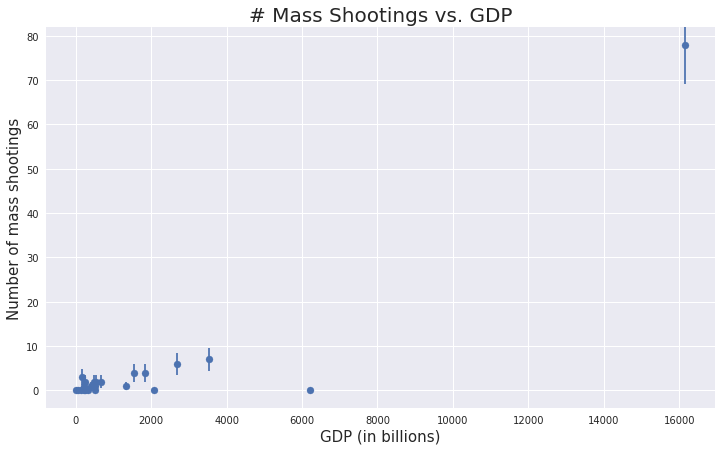


Number of mass shooting vs GDP for countries as of 2012, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings


In [13]:
x=df_.gdp / 1e9
y=df_['# mass shootings']
error=1
xlabel="GDP (in billions)"
ylabel="Number of mass shootings"
title='# Mass Shootings vs. GDP'
scatterplot(x,y,xlabel,ylabel,title,1)
print ("Number of mass shooting vs GDP for countries as of 2012, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings")

### B. Plot mass shooting per capita vs GDP.
---wasn't sure if you wanted to plot mass shooting per capita vs. GDP or mass shootings vs. total population.... See next graph for the latter interpretation-----

Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


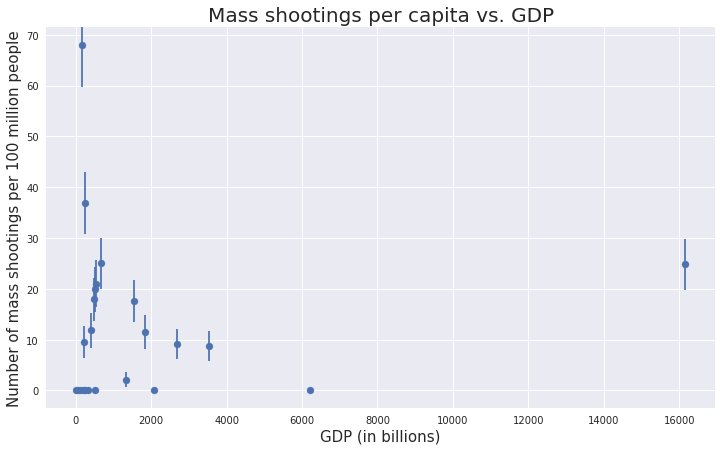


Number of mass shooting per capita *100,000,000 vs GDP in Billions, errors represent Poisson statistics.
USA still looks like an outlier sitting on the far right of the graph, having the highest GDP, however the number of mass shootings per capita is not as drastic a number. New Zealand has the highest mass shootings per capita with 3 total mass shootings and a population of 4408100


In [14]:
df_['shootingspp'] = df_["# mass shootings"] / df_['pop'] * 1e8

x=df_.gdp / 1e9
y=df_['shootingspp']
xlabel="GDP (in billions)"
ylabel=("Number of mass shootings per 100 million people")
title='Mass shootings per capita vs. GDP'
error=1
scatterplot(x,y,xlabel,ylabel,title,error)
print("Number of mass shooting per capita *100,000,000 vs GDP in Billions, " + 
       "errors represent Poisson statistics.\n" + 
       "USA still looks like an outlier sitting on the far right of the graph, " + 
       "having the highest GDP, however the number of mass shootings per capita" +
     " is not as drastic a number. New Zealand has the highest mass shootings per capita"+
      " with 3 total mass shootings and a population of 4408100"
     )

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


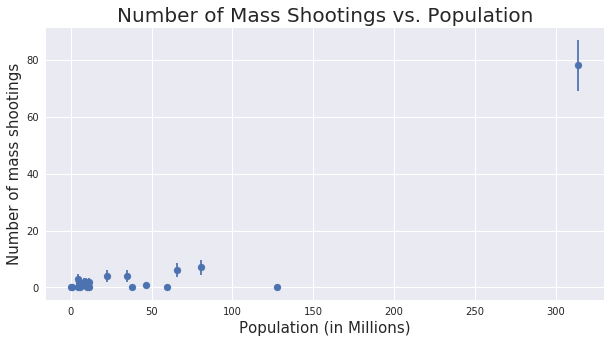

Number of mass shootings vs total population for countries as of 2012, errors represent Poisson statistics.
USA still looks like an outlier sitting on the top right of the graph with highest shootings, as well as highest population.


In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['pop'] / 1e6, df_['# mass shootings'])
ax.errorbar(df_['pop'] / 1e6, df_['# mass shootings'], 
            yerr = np.sqrt(df_['# mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("Population (in Millions)",size=15)
ax.set_ylabel("Number of mass shootings",size=15)
ax.set_ylim()
ax.set_title('Number of Mass Shootings vs. Population',size=20)
pl.show()
print("Number of mass shootings vs total population for countries as of 2012, " + 
       "errors represent Poisson statistics.\n" + 
       "USA still looks like an outlier sitting on the top right of the graph with highest shootings, " + 
       "as well as highest population."
     )

### C. Plot the average number of civilian fire arms per person.
first without errors, then with errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


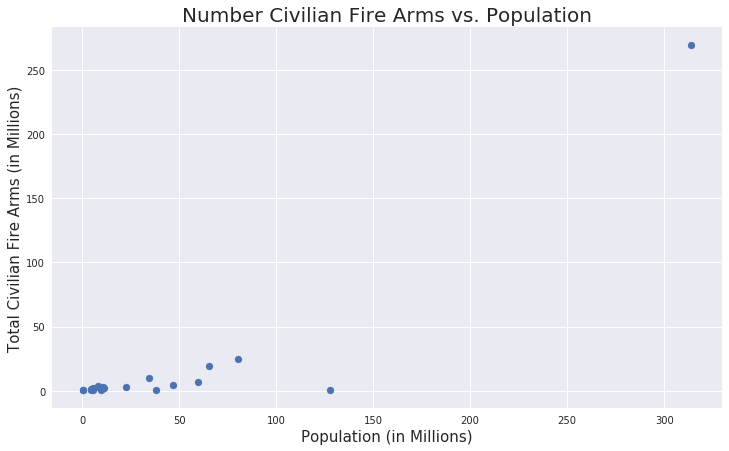


Number of civilian firearms vs total population for countries as of 2012. USA still looks like an outlier sitting on the top right of the graph with highest number of civilian fire arms as well as the highest population.


In [16]:
x=df_['pop'] / 1e6
y=df_['Average total all civilian firearms'] / 1e6
xlabel="Population (in Millions)"
ylabel=("Total Civilian Fire Arms (in Millions)")
title='Number Civilian Fire Arms vs. Population'
scatterplot(x,y,xlabel,ylabel,title)
print("Number of civilian firearms vs total population for countries as of 2012. "+
"USA still looks like an outlier sitting on the top right of the graph with highest " + 
       "number of civilian fire arms as well as the highest population.")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


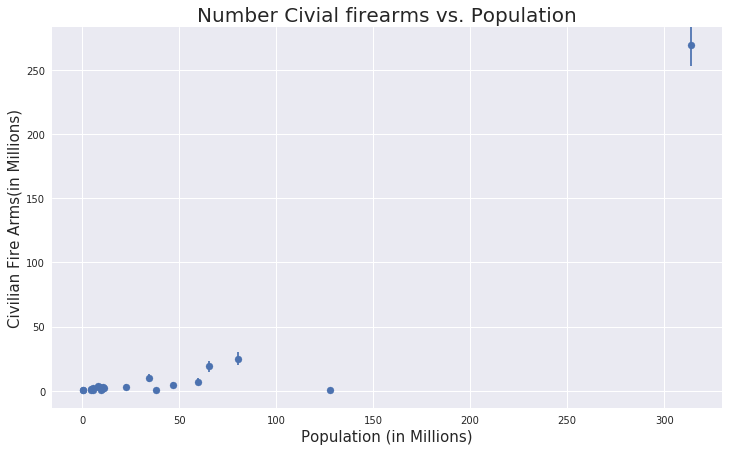


Number of civial firearms vs total population for countries as of 2012, errors represent Poisson statistics.
USA still looks like an outlier sitting on the top right of the graph with highest number of civilian fire arms as well as the highest population.


In [17]:
x=df_['pop'] / 1e6
y=df_['Average total all civilian firearms'] / 1e6
xlabel="Population (in Millions)"
ylabel="Civilian Fire Arms(in Millions)"
title='Number Civial firearms vs. Population'
scatterplot(x,y,xlabel,ylabel,title,1)
print("Number of civial firearms vs total population for countries as of 2012, " + 
       "errors represent Poisson statistics.\n" + 
       "USA still looks like an outlier sitting on the top right of the graph with highest " + 
       "number of civilian fire arms as well as the highest population."
     )

### D. Plot the average number of homicide by fire arms per person.
a. first as a histogram


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


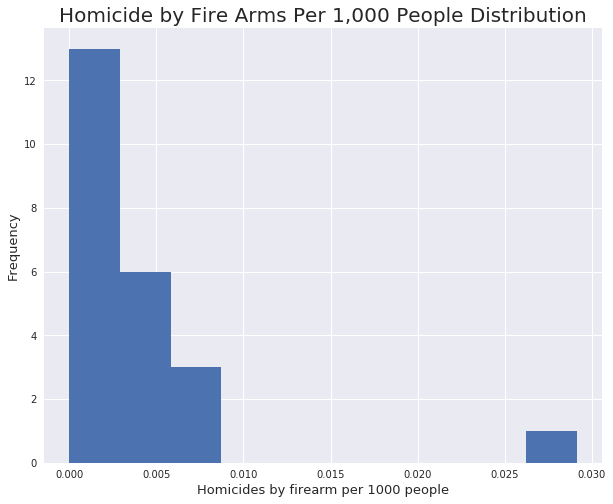

Distribution of the number of homicides for each 1,000 in countries as of 2012. USA still looks like an outlier on the far right of the graph with the highest rate of homicides by fire arm per capita. This distribution suggests that the rate of gun violence occurring in the US is abnormally high, even when accounting for population.


In [18]:
fig = pl.figure(figsize=(10,8)) 
ax=fig.add_subplot(111)
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('Homicides by firearm per 1000 people',size=13);
ax.set_ylabel("Frequency",size=13)
ax.set_ylim()
ax.set_title('Homicide by Fire Arms Per 1,000 People Distribution',size=20)
pl.show()
print("Distribution of the number of homicides for each 1,000 in countries as of 2012. " + 
       "USA still looks like an outlier on the far right of the graph with the highest " + 
       "rate of homicides by fire arm per capita. This distribution suggests that the rate of gun"+
      " violence occurring in the US is abnormally high, even when accounting for population."
     )

b... then plot homicides by fire arms against the country GDP, with statistical errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


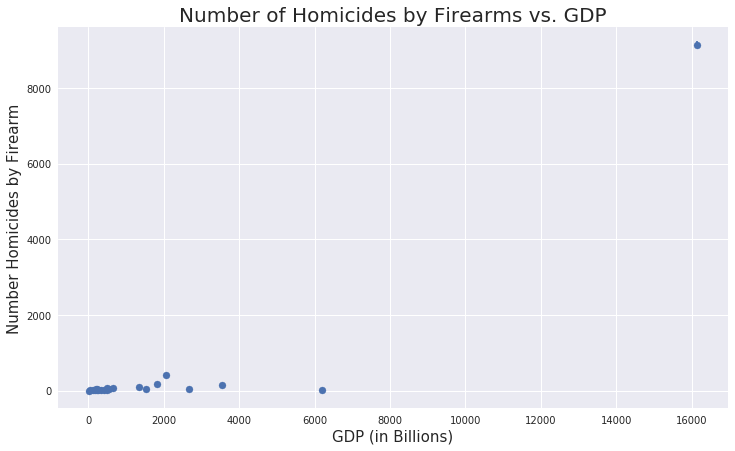

Summary: 
Number of homicides by firearms vs. GDP for countries as of 2012, errors represent Poisson statistics.
USA still looks like an outlier on the far right of the graph with highest GDP. It is difficult to distinguish any differences in number of homicides by firearmsince the errorbars are so incredibly vast.


In [19]:
x=df_['gdp'] / 1e9
y=df_['Number of homicides by firearm'] 
xlabel=("GDP (in Billions)")
ylabel="Number Homicides by Firearm"
title='Number of Homicides by Firearms vs. GDP'
commentary=("Number of homicides by firearms vs. GDP for countries as of 2012, " + 
       "errors represent Poisson statistics.\n" + 
       "USA still looks like an outlier on the far right of the graph with highest GDP. " + 
            "It is difficult to distinguish any differences in number of homicides by firearm"+
           "since the errorbars are so incredibly vast.")
scatterplot(x,y,xlabel,ylabel,title,1,commentary)
    

### D. Plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


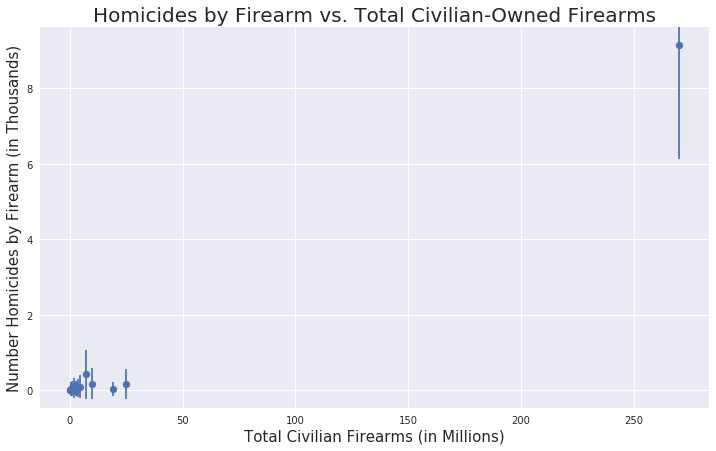

Summary: 
Number of homicides by firearms vs. the total amount of civial-owned registered firearms as of 2012errors represent Poisson statistics. The US is still up in its far upper right hand corner, waving the AMerican flagloud and proud. 


In [20]:
x=(df_['Average total all civilian firearms']/1e6)
y=(df_['Number of homicides by firearm']/1e3)
xlabel="Total Civilian Firearms (in Millions)"
ylabel="Number Homicides by Firearm (in Thousands)"
title='Homicides by Firearm vs. Total Civilian-Owned Firearms'
commentary=('Number of homicides by firearms vs. the total amount of civial-owned registered firearms as of 2012'+
'errors represent Poisson statistics. The US is still up in its far upper right hand corner, waving the AMerican flag'+
            'loud and proud. ')
scatterplot(x,y,xlabel,ylabel,title,1,commentary)

## # E. Plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


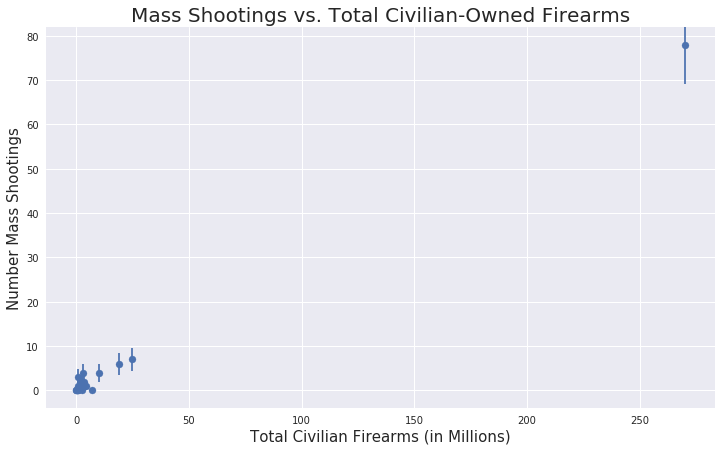

Summary: 
Mass shootings vs. the total amount of civial-owned registered firearms in countries as of 2012errors represent Poisson statistics. The US is still up in its far upper right hand corner, waving the AMerican flagloud and proud. 


In [21]:
x=(df_['Average total all civilian firearms']/1e6)
y=(df_['# mass shootings'])
xlabel="Total Civilian Firearms (in Millions)"
ylabel="Number Mass Shootings"
title='Mass Shootings vs. Total Civilian-Owned Firearms'
commentary=('Mass shootings vs. the total amount of civial-owned registered firearms in countries as of 2012'+
'errors represent Poisson statistics. The US is still up in its far upper right hand corner, waving the AMerican flag'+
            'loud and proud. ')
scatterplot(x,y,xlabel,ylabel,title,1,commentary)

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [22]:
df_.sort_values(['Average total all civilian firearms'],inplace=True)
x=(df_['Average total all civilian firearms']/df_['Average total all civilian firearms'].mean())
y=(df_['# mass shootings']/df_['# mass shootings'].mean())
smresult = sm.OLS(y, sm.add_constant(x)).fit()
beta0_sm, beta1_sm = smresult.params

In [23]:
# Adding weights to the WLS model.
# To account for some y values equal to 0, I am adding 1e-3 to all y values 
# before taking the square root & inverse.
w=1/np.sqrt(y+1e-3)
smresult2 = sm.WLS(y, sm.add_constant(x),weights=w).fit()
beta0_smw, beta1_smw = smresult2.params

In [24]:
# Creating new x and y after removing USA from the dataset.
x1=(df_['Average total all civilian firearms'][:-1]/df_['Average total all civilian firearms'][:-1].mean())
y1=(df_['# mass shootings'][:-1]/df_['# mass shootings'][:-1].mean())
smresult1 = sm.OLS(y1, sm.add_constant(x1)).fit()
beta0_sm1, beta1_sm1 = smresult1.params

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


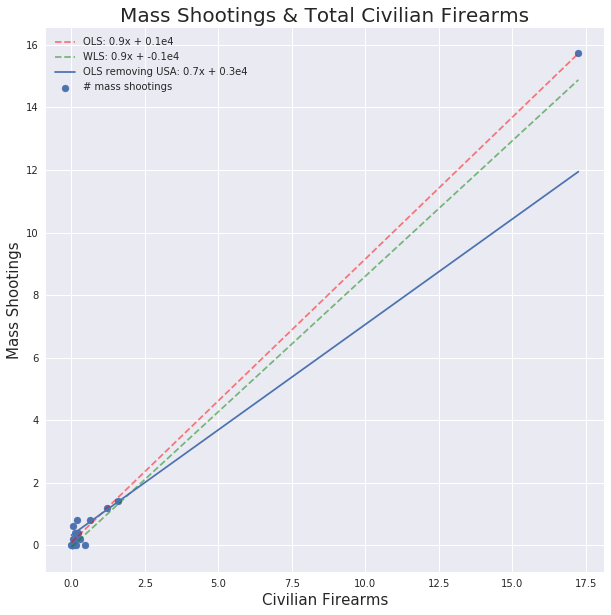

The WLS and OLS models are quite similar with the same slope but different intercepts. The WLS model is clearly influenced by those points with zero value. When removing the USA from the model, the regression line is entirely different. After seeing the effect I speculate the US is an outlier and I want to investigate further after removing it from the dataset.


In [25]:
xlabel='Civilian Firearms'
ylabel='Mass Shootings'
title='Mass Shootings & Total Civilian Firearms'
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y)
ax.set_xlabel(xlabel,size=15)
ax.set_ylabel(ylabel,size=15)
ax.set_title(title,size=20)
#ax.errorbar(x, y, yerr = np.sqrt(y*1.0), fmt = '.')
pl.plot(x, x* beta1_sm + beta0_sm , 'r--',alpha=0.5,label="OLS: %.1fx + %.1fe4"%(beta1_sm, beta0_sm))
pl.plot(x, x* beta1_smw + beta0_smw,'g--',alpha=0.5, label="WLS: %.1fx + %.1fe4"%(beta1_smw, beta0_smw))
pl.plot(x,x*beta1_sm1+beta0_sm1,label='OLS removing USA: %.1fx + %.1fe4'%(beta1_sm1, beta0_sm1))
pl.legend(loc=2)
ax.set_ylim()
ax.set_xlim()
pl.show()
print('The WLS and OLS models are quite similar with the same slope but different intercepts. The WLS model'+
      ' is clearly influenced by those points with zero value. When removing the USA from the model, the regression line '+
     'is entirely different. After seeing the effect I speculate the US is an outlier and I want to investigate further after removing it from the dataset.')

Text(0.5,0,'Civilian Firearms')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


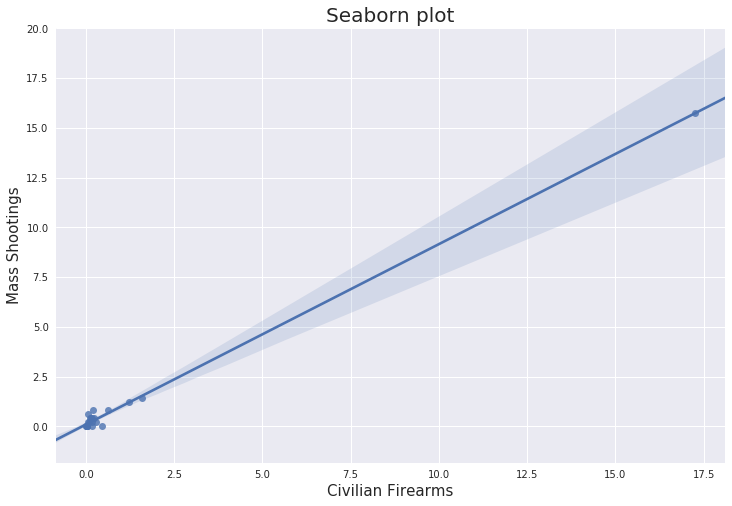

In [26]:
pl.figure(figsize=(12,8))
pl.title('Seaborn plot',size=20)
sns.regplot(x=x,y=y,data=df)
pl.ylabel('Mass Shootings',size=15)
pl.xlabel('Civilian Firearms',size=15)

In [27]:
## Removing the United States as an outlier to get a better understanding of all the other countries.
w= np.sqrt(y1+1e-5)
smresult3 = sm.WLS(y1, sm.add_constant(x1),weights=w).fit()
b_smw, a_smw = smresult3.params

In [28]:
a_np, b_np, c_np= np.polyfit(x1, y1, 2) 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


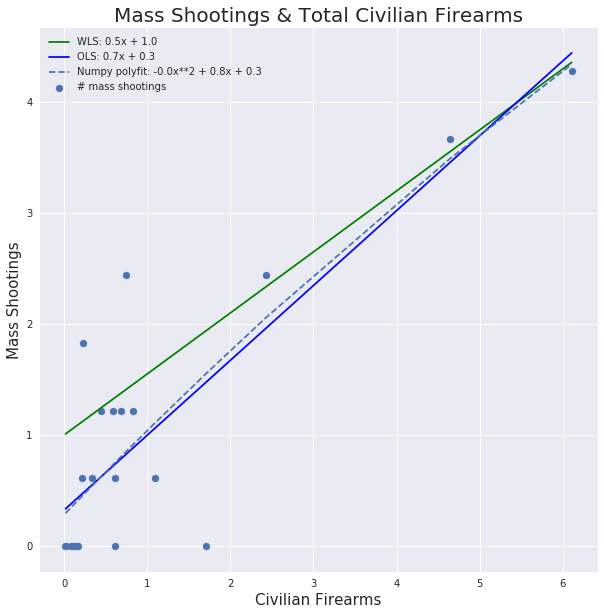

Now that the USA is not skewing the plot, the relationship between civilians owning firearmsand mass shootings is a bit more clear. Many countries have never had any mass shootings and lie along the x-axis. The WLS model takes that into account and penalizes those points, therefore the WLS regression line has a larger intercept and shallower slope. In this case, I believe the OLS regression is more important because the countries with zero mass shootings and high firearm ownership are equally as significant as all other data points. Finally, I tried to fit a polynomial to the seconddegree using numpy polyfit, and it produced a polynomial with a negligible coefficient for x-squared.


In [29]:
xlabel='Civilian Firearms'
ylabel='Mass Shootings'
title='Mass Shootings & Total Civilian Firearms'
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(x1, y1)
ax.set_xlabel(xlabel,size=15)
ax.set_ylabel(ylabel,size=15)
ax.set_title(title,size=20)
#ax.errorbar(x, y, yerr = np.sqrt(y*1.0), fmt = '.')
pl.plot(x1, x1* a_smw + b_smw ,'g',label="WLS: %.1fx + %.1f"%(a_smw, b_smw))
pl.plot(x1,x1*beta1_sm1+beta0_sm1,'b-',label='OLS: %.1fx + %.1f'%(beta1_sm1, beta0_sm1))
pl.plot(x1,a_np*x1**2+b_np*x1+c_np,'--',label='Numpy polyfit: %.1fx**2 + %.1fx + %.1f'%(a_np, b_np,c_np))

pl.legend(loc=2)
ax.set_ylim()
ax.set_xlim()
pl.show()
print('Now that the USA is not skewing the plot, the relationship between civilians owning firearms'+
     'and mass shootings is a bit more clear. Many countries have never had any mass shootings and '+
     'lie along the x-axis. The WLS model takes that into account and penalizes those points, '+
     'therefore the WLS regression line has a larger intercept and shallower slope. In this case, I '+
     'believe the OLS regression is more important because the countries with zero mass shootings and high firearm ownership'+
     ' are equally as significant as all other data points. Finally, I tried to fit a polynomial to the second'+
     'degree using numpy polyfit, and it produced a polynomial with a negligible coefficient for x-squared.'
     )

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


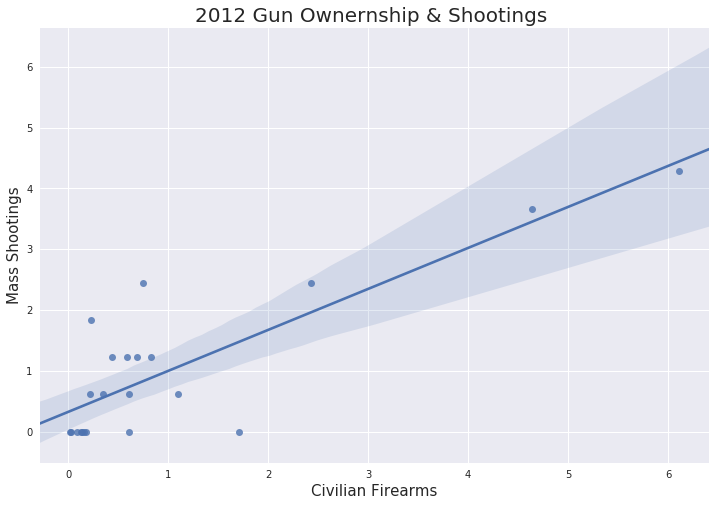

This plot produced using the python seaborn package illustrates that as a trend line diverges farther from the centroid where the majority of datapoints live, the errors in the regression line increase.


In [30]:
pl.figure(figsize=(12,8))
pl.title('2012 Gun Ownernship & Shootings ',size=20)
sns.regplot(x=x1,y=y1,data=df)
pl.ylabel('Mass Shootings',size=15)
pl.xlabel('Civilian Firearms',size=15)
pl.show()
print('This plot produced using the python seaborn package illustrates that as a trend line diverges farther '+
     'from the centroid where the majority of datapoints live, the errors in the regression line increase.')

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [43]:
from scipy.stats import t

In [72]:
t=scipy.stats.t.ppf(0.975,len(x1)-2)
MSE=smresult1.mse_total
denom=((x1-1)**2).sum()

In [73]:
## The mean is just 1 since I normalized x1
errorrr=t*np.sqrt(MSE*(1+(1/len(x1))+(((x1-1)**2)/denom)))

In [ ]:
pl.figure()
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


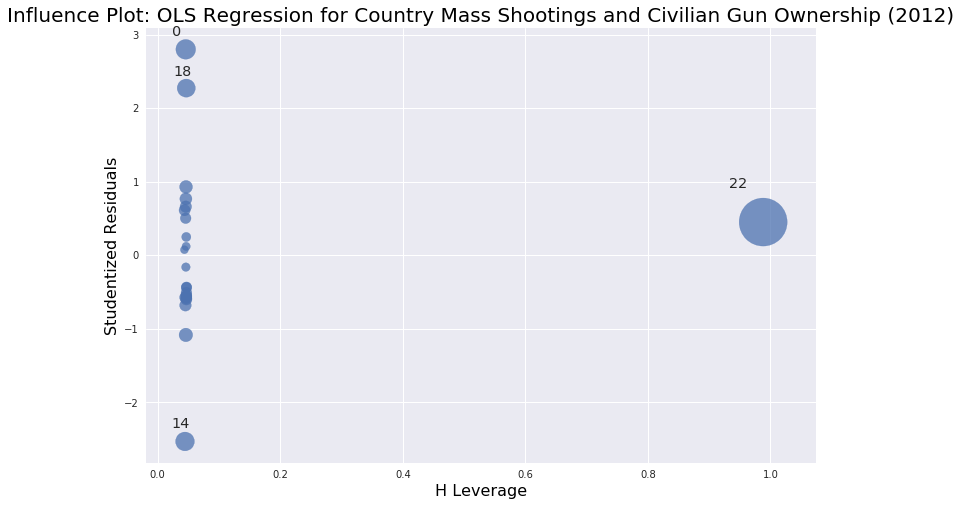

The USA datapoint in the initial OLS regression had the most significant influence on the model.While other datapoints such as 0 and 18 had much higher variancs, they had the same amount of influenceon the fit as the other datapoints with much smaller variance.


In [41]:
fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.influence_plot(smresult, ax=ax,alpha  = 0.05, criterion="cooks")
ax.set_title('Influence Plot: OLS Regression for Country Mass Shootings and Civilian Gun Ownership (2012)',size=20)
pl.show()
print('The USA datapoint in the initial OLS regression had the most significant influence on the model.'+
     'While other datapoints such as 0 and 18 had much higher variancs, they had the same amount of influence'+
     'on the fit as the other datapoints with much smaller variance.')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


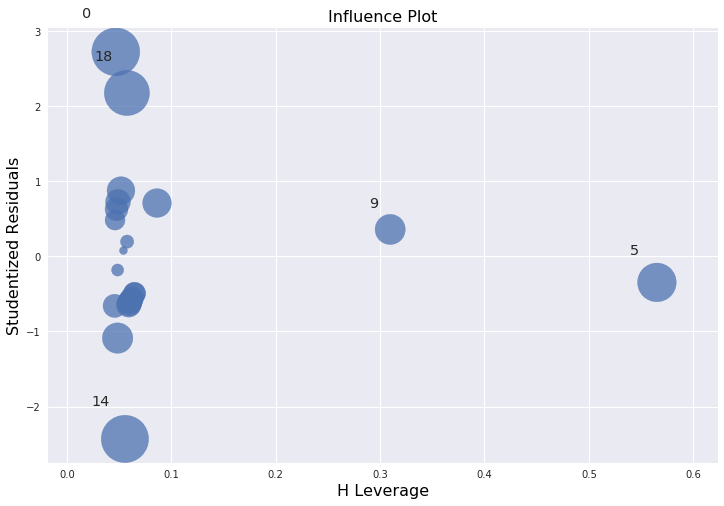

        Country  # mass shootings  Number of homicides by firearm
0     Australia                 4                            30.0
1       Austria                 1                            18.0
2       Belgium                 2                            70.0
3        Canada                 4                           173.0
4   Switzerland                 2                            57.0
5       Germany                 7                           158.0
6       Denmark                 0                            15.0
7         Spain                 1                            90.0
8       Finland                 2                            24.0
9        France                 6                            35.0
10       Greece                 0                            29.0
11      Hungary                 0                             7.0
12      Ireland                 0                            21.0
13      Iceland                 0                             0.0
14        

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.influence_plot(smresult1, ax=ax,alpha  = 0.05, criterion="cooks")
pl.show()
print(df_[['Country','# mass shootings','Number of homicides by firearm']][0:22].sort_index())
print('\n\nThe influence plot is for an OLS regression relating the total number of homicides by firearm to # of mass'+
     'shootings in the countries listed in the table below the graph as of data provided in 2012. Germany (5) has the highest influence on this regression, with the highest number of mass shootings'+
     'of all countries listed, followed by France (9) with the second highest influence and number of shootings, both with little variance.'+
     'Countries like New Zealand (18) with higher rate of mass shootings compared to total civilian owned guns (a relative'+
     'ratio of 3/7 for the normalized data) has a large positive residual, however little influence, while countries like Italy'+
     'with low mass shootings compared to total gun ownership (0/417) have a large negative residual, also with little influence.')

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings